<a href="https://colab.research.google.com/github/hqu/networkx_demo/blob/main/EpidemicSpread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
G_orginal = nx.Graph()
G = nx.Graph()
Gcc = nx.Graph()
G.clear()
G_orginal.clear()
Gcc.clear()

In [3]:
def gen_graph(n,p):
    G_orginal = nx.erdos_renyi_graph(n, p)
    return G_orginal

def gen_graph_BA(n,m):
    G_orginal = nx.barabasi_albert_graph(n, m)
    return G_orginal

def get_giant_component(graph):
    Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
    G = graph.subgraph(Gcc[0])
    return G

In [4]:
def get_infected_nodes():
    infected_nodes = [x for x,y in G.nodes(data=True) if y['state']==1]
    return infected_nodes

def get_recovered_nodes():
    recovered_nodes = [x for x,y in G.nodes(data=True) if y['state']==2]
    return recovered_nodes

def get_susceptible_nodes():
    susceptible_nodes = [x for x,y in G.nodes(data=True) if y['state']==0]
    return susceptible_nodes

In [5]:
def print_stats():
    print("time periods: ", num_periods)
    print("peak cases: ", max(epi_curve_data))
    print("peak time period: ", epi_curve_data.index(max(epi_curve_data)))
    r0 = round(((alpha*avg_deg)/mu), 2)
    print("R0: ", r0)
    print("average degree: ", avg_deg)
    print("Susceptible left: ", len(get_susceptible_nodes()))

In [6]:
def spread_virus_annealed():
    infected_nodes_list = get_infected_nodes()
    t = 0
    infected_num_list = []
    recovered_num_list = []
    susceptible_num_list = []
    G_next = nx.random_degree_sequence_graph(degrees)
    while(len(infected_nodes_list)>0):
        t=t+1
        infected_nodes_list = get_infected_nodes()
        num_infected = len(infected_nodes_list)
        recovered_nodes_list = get_recovered_nodes()
        num_recovered = len(recovered_nodes_list)
        susceptible_nodes_list = get_susceptible_nodes()
        num_susceptible = len(susceptible_nodes_list)        
        infected_num_list.append(num_infected)
        recovered_num_list.append(num_recovered)
        susceptible_num_list.append(num_susceptible)
        for i in infected_nodes_list:
            neibs = list(G_next.neighbors(i))
            #print("node: "+str(i))
            for j in neibs:
                #print(j)
                if (G.nodes[j]['state']==0):
                    #print(j)
                    if (np.random.binomial(1,alpha) == 1):
                        #print("neib: "+str(j))
                        G.nodes[j]['state']=1
                        #print("state: "+ str(G.nodes[j]['state']))
            if (np.random.binomial(1,mu) == 1):
                G.nodes[i]['state']=2
        infected_nodes_list = get_infected_nodes()
        #print(infected_nodes_list)
    #print("Time period: ",t)
    #print("infected nodes: ", get_infected_nodes())
    #print("recovered nodes: ", len(get_recovered_nodes()))
    #print("susceptible nodes: ", len(get_susceptible_nodes()))
    return t, infected_num_list, recovered_num_list, susceptible_num_list

In [7]:
def spread_virus():
    infected_nodes_list = get_infected_nodes()
    t = 0
    infected_num_list = []
    recovered_num_list = []
    susceptible_num_list = []
    while(len(infected_nodes_list)>0):
        t=t+1
        infected_nodes_list = get_infected_nodes()
        num_infected = len(infected_nodes_list)
        recovered_nodes_list = get_recovered_nodes()
        num_recovered = len(recovered_nodes_list)
        susceptible_nodes_list = get_susceptible_nodes()
        num_susceptible = len(susceptible_nodes_list)        
        infected_num_list.append(num_infected)
        recovered_num_list.append(num_recovered)
        susceptible_num_list.append(num_susceptible)
        for i in infected_nodes_list:
            neibs = list(G.neighbors(i))
            #print("node: "+str(i))
            for j in neibs:
                #print(j)
                if (G.nodes[j]['state']==0):
                    #print(j)
                    if (np.random.binomial(1,alpha) == 1):
                        #print("neib: "+str(j))
                        G.nodes[j]['state']=1
                        #print("state: "+ str(G.nodes[j]['state']))
            if (np.random.binomial(1,mu) == 1):
                G.nodes[i]['state']=2
        infected_nodes_list = get_infected_nodes()
        #print(infected_nodes_list)
    #print("Time period: ",t)
    #print("infected nodes: ", get_infected_nodes())
    #print("recovered nodes: ", len(get_recovered_nodes()))
    #print("susceptible nodes: ", len(get_susceptible_nodes()))
    return t, infected_num_list, recovered_num_list, susceptible_num_list

In [8]:
def init_conditions():
    state = 0
    nx.set_node_attributes(G, state, "state")
    G.nodes[6]['state'] = 1
    G.nodes[3]['state'] = 1
    G.nodes[2]['state'] = 1

In [9]:
G_orginal = nx.Graph()
G = nx.Graph()
Gcc = nx.Graph()
G.clear()
G_orginal.clear()
Gcc.clear()

In [10]:
n =1000
p =.008
G_original = gen_graph(n,p)
G = get_giant_component(G_original)
degrees = [val for (node, val) in G.degree()]
avg_deg = G.number_of_edges()/n

In [14]:
mu = .9
alpha = .2

# Mu = .9  Alpha = .2

## Random Graph: N = 1000, p = .008

In [15]:
init_conditions()
num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus()

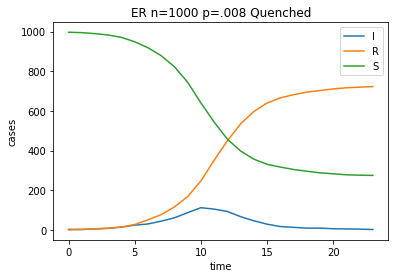

In [16]:
x = list(range(0, len(epi_curve_data)))
fig = plt.figure()
ax = plt.axes()
ax.plot(x, epi_curve_data, label='I')
ax.plot(x, rec_curve_data, label='R')
ax.plot(x, sup_curve_data, label='S')
ax.set(xlabel='time', ylabel='cases', title='ER n=1000 p=.008 Quenched');
plt.legend()

In [17]:
print_stats()

time periods:  24
peak cases:  112
peak time period:  10
R0:  0.89
average degree:  3.999
Susceptible left:  275


In [18]:
init_conditions()
num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus_annealed()
#epi_curve_data

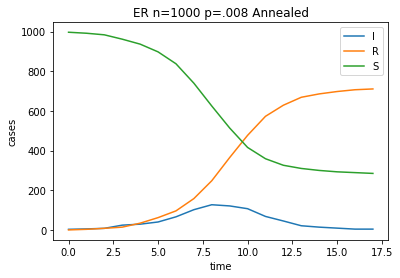

In [19]:
x = list(range(0, len(epi_curve_data)))
fig = plt.figure()
ax = plt.axes()
ax.plot(x, epi_curve_data, label='I')
ax.plot(x, rec_curve_data, label='R')
ax.plot(x, sup_curve_data, label='S')
ax.set(xlabel='time', ylabel='cases', title='ER n=1000 p=.008 Annealed');
plt.legend()

In [20]:
print_stats()

time periods:  18
peak cases:  127
peak time period:  8
R0:  0.89
average degree:  3.999
Susceptible left:  285


In [21]:
G_orginal = nx.Graph()
G = nx.Graph()
Gcc = nx.Graph()
G.clear()
G_orginal.clear()
Gcc.clear()

## BA Graph: N = 1000, m = 4

In [22]:
m = 4
G = gen_graph_BA(n,m)
degrees = [val for (node, val) in G.degree()]
avg_deg = G.number_of_edges()/n

In [23]:
init_conditions()
num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus()
#epi_curve_data

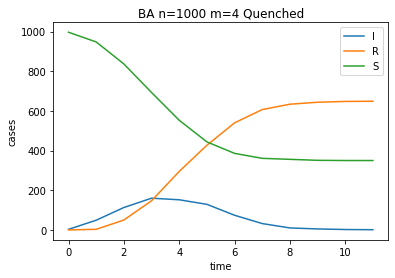

In [24]:
x = list(range(0, len(epi_curve_data)))
fig = plt.figure()
ax = plt.axes()
ax.plot(x, epi_curve_data, label='I')
ax.plot(x, rec_curve_data, label='R')
ax.plot(x, sup_curve_data, label='S')
ax.set(xlabel='time', ylabel='cases', title='BA n=1000 m=4 Quenched');
plt.legend()

In [25]:
print_stats()

time periods:  12
peak cases:  160
peak time period:  3
R0:  0.89
average degree:  3.984
Susceptible left:  350


In [ ]:
init_conditions()
num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus_annealed()
#epi_curve_data

In [ ]:
x = list(range(0, len(epi_curve_data)))
fig = plt.figure()
ax = plt.axes()
ax.plot(x, epi_curve_data, label='I')
ax.plot(x, rec_curve_data, label='R')
ax.plot(x, sup_curve_data, label='S')
ax.set(xlabel='time', ylabel='cases', title='BA n=1000 m=4 Annealed');
plt.legend()

In [ ]:
print_stats()

time periods:  7
peak cases:  458
peak time period:  3
R0:  2.66
average degree:  3.984
Susceptible left:  12


## ER graphs, increase the value of "p"

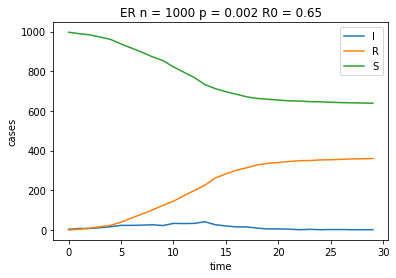

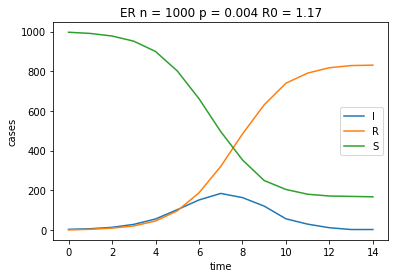

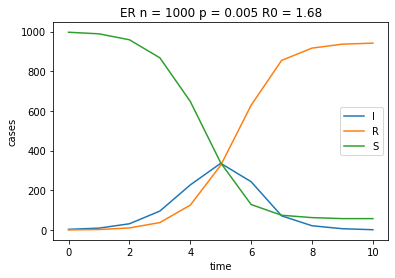

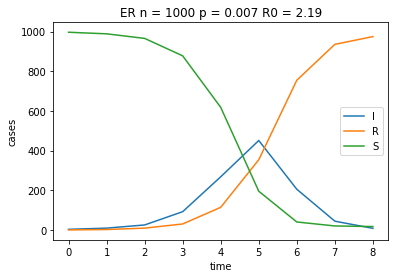

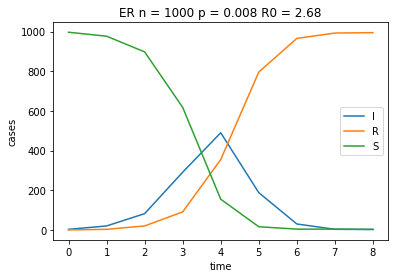

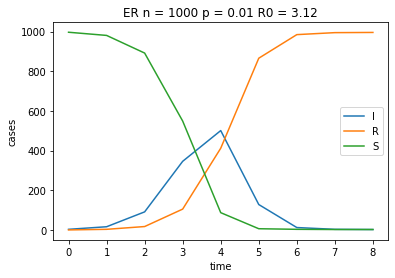

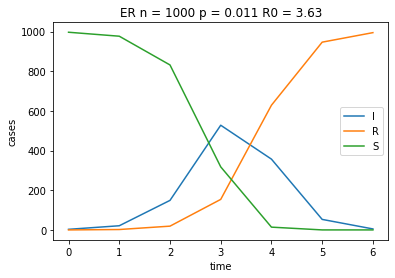

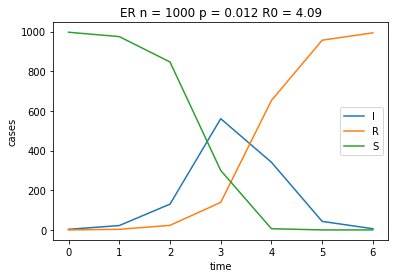

In [ ]:
G.clear()
for p in np.arange(.002, .014, 0.0015):
    G.clear()
    G = gen_graph(n,p)
    degrees = [val for (node, val) in G.degree()]
    avg_deg = G.number_of_edges()/n
    r0 = round(((alpha*avg_deg)/mu), 2)
    init_conditions()
    num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus()
    x = list(range(0, len(epi_curve_data)))
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x, epi_curve_data, label='I')
    ax.plot(x, rec_curve_data, label='R')
    ax.plot(x, sup_curve_data, label='S')
    ax.set(xlabel='time', ylabel='cases');
    plt.title('ER n = 1000 p = '+str(round(p, 3))+' R0 = '+str(r0))
    plt.legend()

## ER graphs, increase the value of "n"

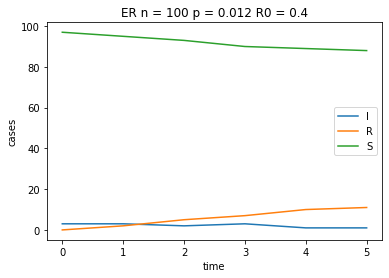

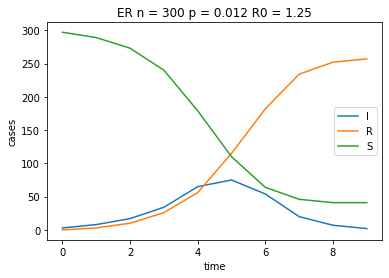

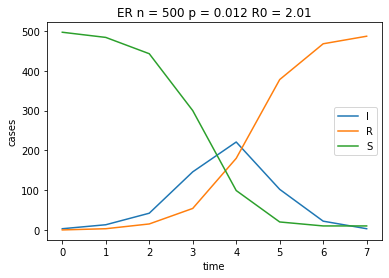

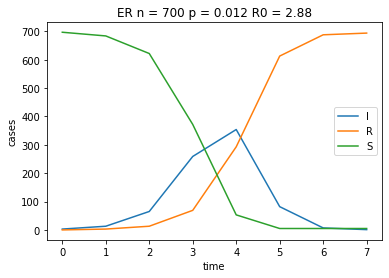

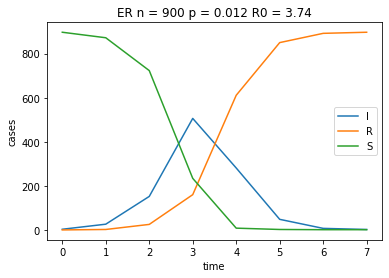

In [ ]:
G.clear()
for n in np.arange(100, 1000, 200):
    G.clear()
    G = gen_graph(n,p)
    degrees = [val for (node, val) in G.degree()]
    avg_deg = G.number_of_edges()/n
    r0 = round(((alpha*avg_deg)/mu), 2)
    init_conditions()
    num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus()
    x = list(range(0, len(epi_curve_data)))
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x, epi_curve_data, label='I')
    ax.plot(x, rec_curve_data, label='R')
    ax.plot(x, sup_curve_data, label='S')
    ax.set(xlabel='time', ylabel='cases');
    plt.title('ER n = '+str(n)+' p = '+str(round(p, 3))+' R0 = '+str(r0))
    plt.legend()

## BA graphs, increase the value of "m"

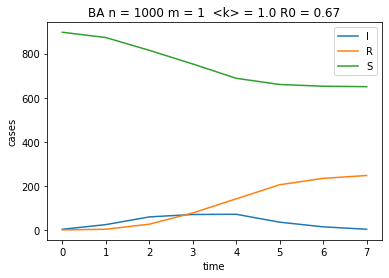

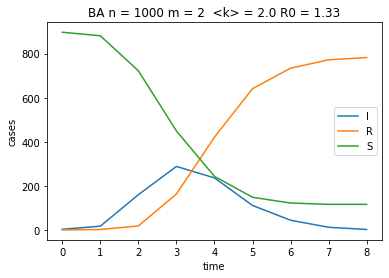

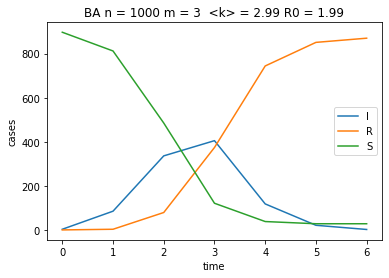

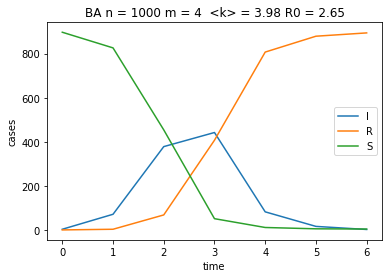

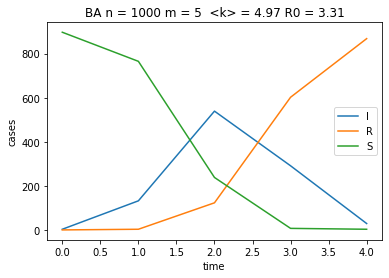

In [ ]:
G.clear()
for m in range(1,6):
    G.clear()
    G = gen_graph_BA(n,m)
    degrees = [val for (node, val) in G.degree()]
    avg_deg = G.number_of_edges()/n
    r0 = round(((alpha*avg_deg)/mu), 2)
    init_conditions()
    num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus()
    x = list(range(0, len(epi_curve_data)))
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x, epi_curve_data, label='I')
    ax.plot(x, rec_curve_data, label='R')
    ax.plot(x, sup_curve_data, label='S')
    ax.set(xlabel='time', ylabel='cases');
    plt.title('BA n = 1000 m = '+str(m)+'  <k> = '+str(round(avg_deg,2)) +' R0 = '+str(r0))
    plt.legend()

## BA graphs, increase the value of "n" holding "m=2" constant

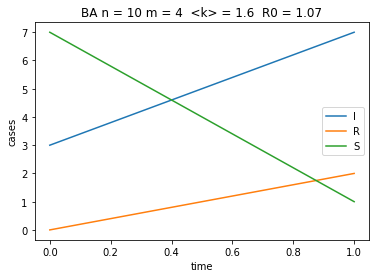

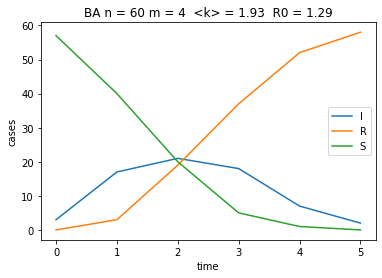

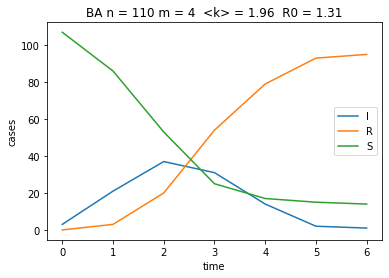

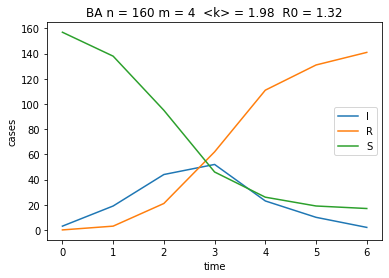

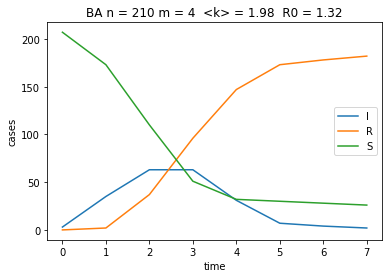

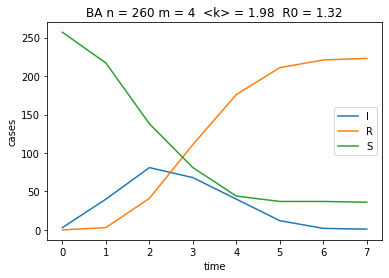

In [ ]:
G.clear()
m=2
alpha=.6
for n in np.arange(10, 300, 50):
    G.clear()
    G = gen_graph_BA(n,m)
    degrees = [val for (node, val) in G.degree()]
    avg_deg = G.number_of_edges()/n
    r0 = round(((alpha*avg_deg)/mu), 2)
    init_conditions()
    num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus()
    x = list(range(0, len(epi_curve_data)))
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x, epi_curve_data, label='I')
    ax.plot(x, rec_curve_data, label='R')
    ax.plot(x, sup_curve_data, label='S')
    ax.set(xlabel='time', ylabel='cases');
    plt.title('BA n = '+str(n)+' m = 4  <k> = '+str(round(avg_deg,2)) +'  R0 = '+str(r0))
    plt.legend()

## BA graphs, increase the value of "n" holding "m=10" constant

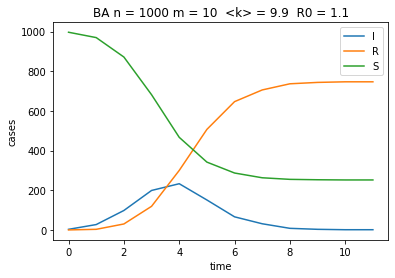

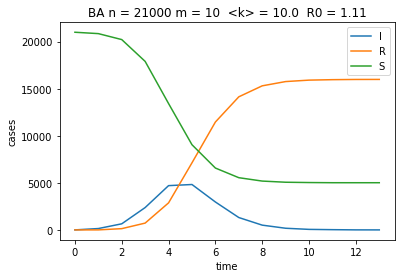

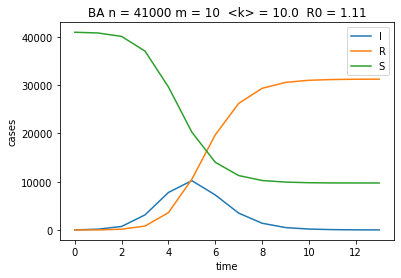

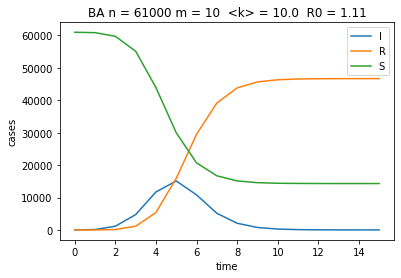

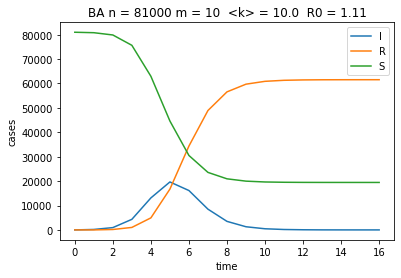

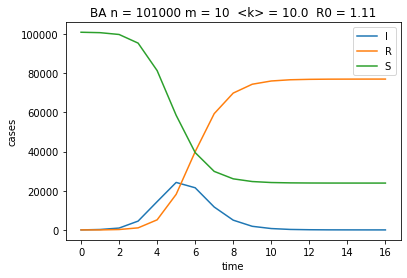

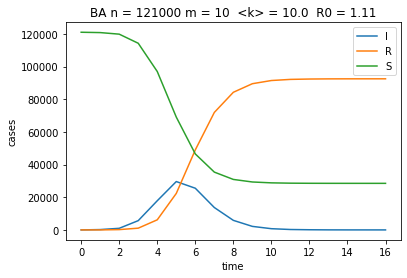

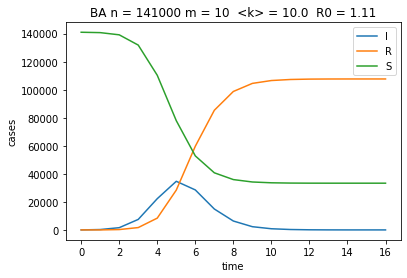

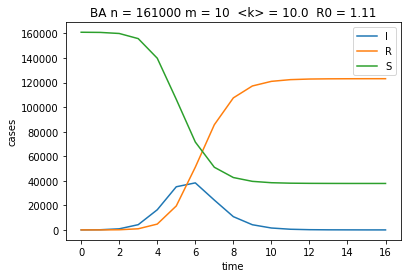

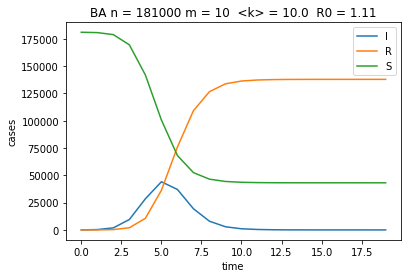

In [ ]:
G.clear()
m=10
alpha=.1
for n in np.arange(1000, 200000, 20000):
    G.clear()
    G = gen_graph_BA(n,m)
    degrees = [val for (node, val) in G.degree()]
    avg_deg = G.number_of_edges()/n
    r0 = round(((alpha*avg_deg)/mu), 2)
    init_conditions()
    num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus()
    x = list(range(0, len(epi_curve_data)))
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x, epi_curve_data, label='I')
    ax.plot(x, rec_curve_data, label='R')
    ax.plot(x, sup_curve_data, label='S')
    ax.set(xlabel='time', ylabel='cases');
    plt.title('BA n = '+str(n)+' m = 10  <k> = '+str(round(avg_deg,2)) +'  R0 = '+str(r0))
    plt.legend()

In [ ]:
#@title


In [ ]:
#fig = plt.figure(figsize=(8,10))
#nx.draw_spring(G, node_size=20, with_labels = True)